Confusion matrix, without normalization
Confusion matrix, without normalization
[0.9090909090909091, 0.9390909090909091, 0.8390909090909091, 0.899090909090909, 0.9190909090909091]


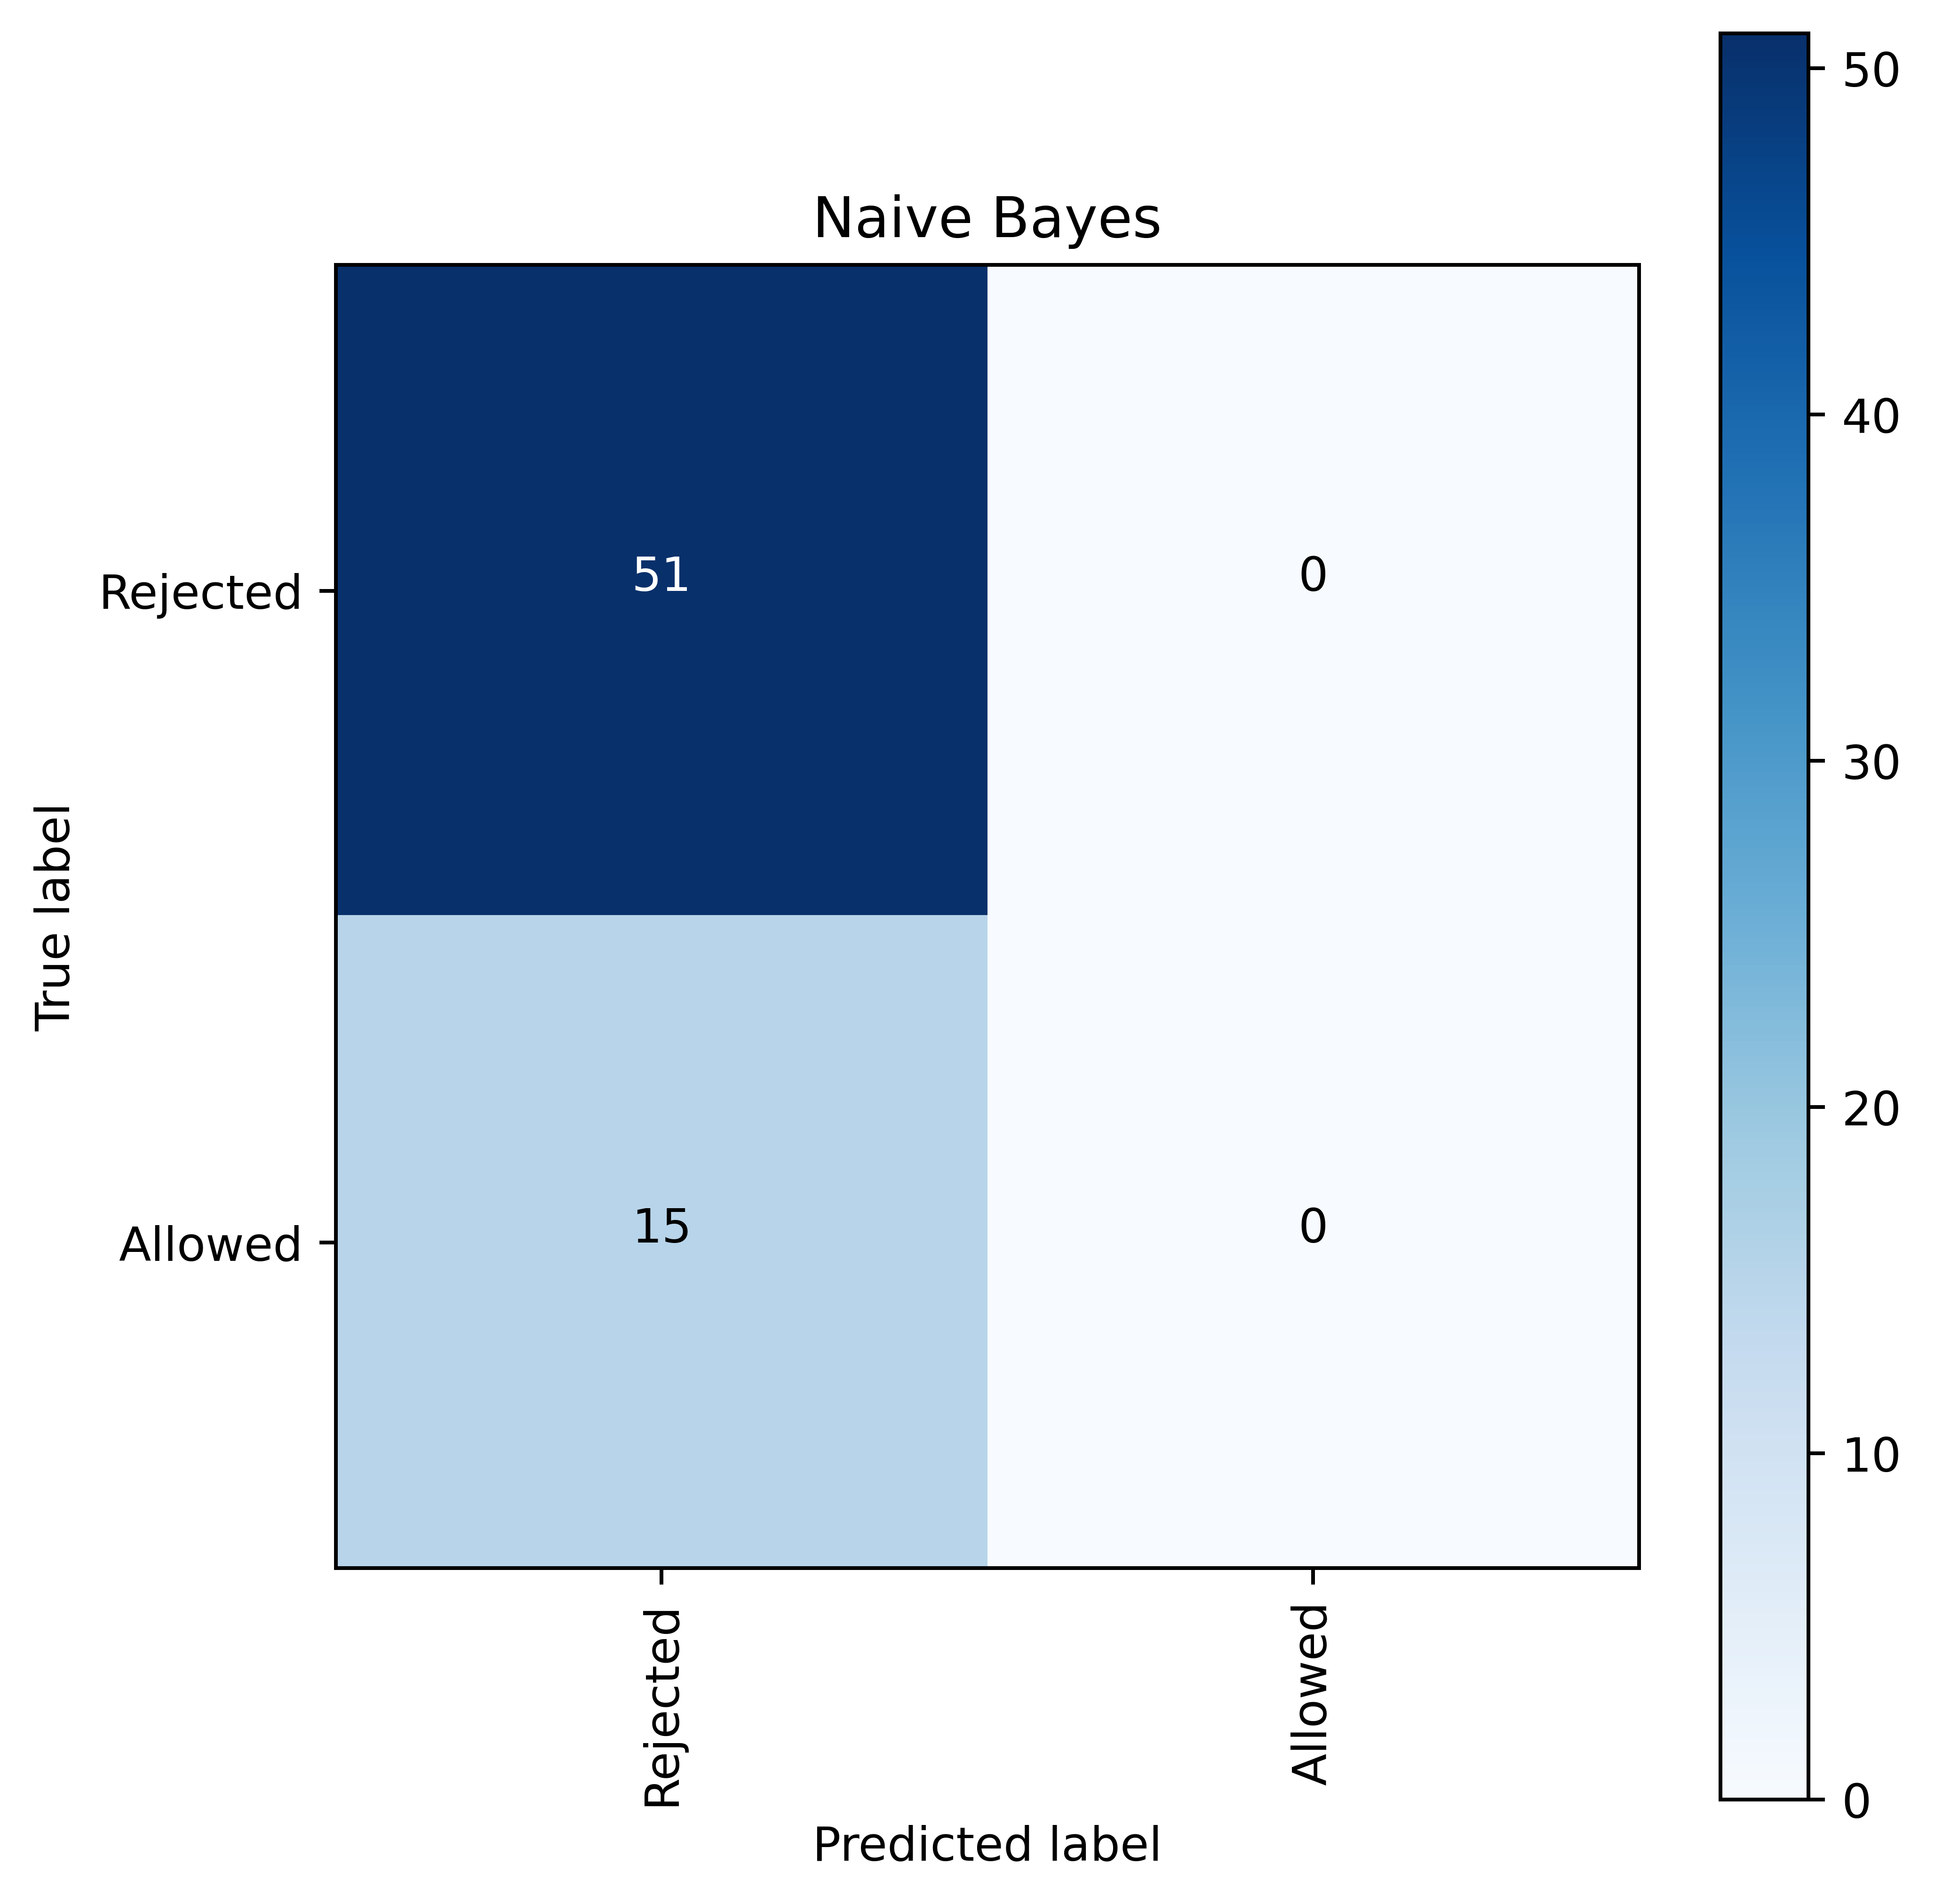

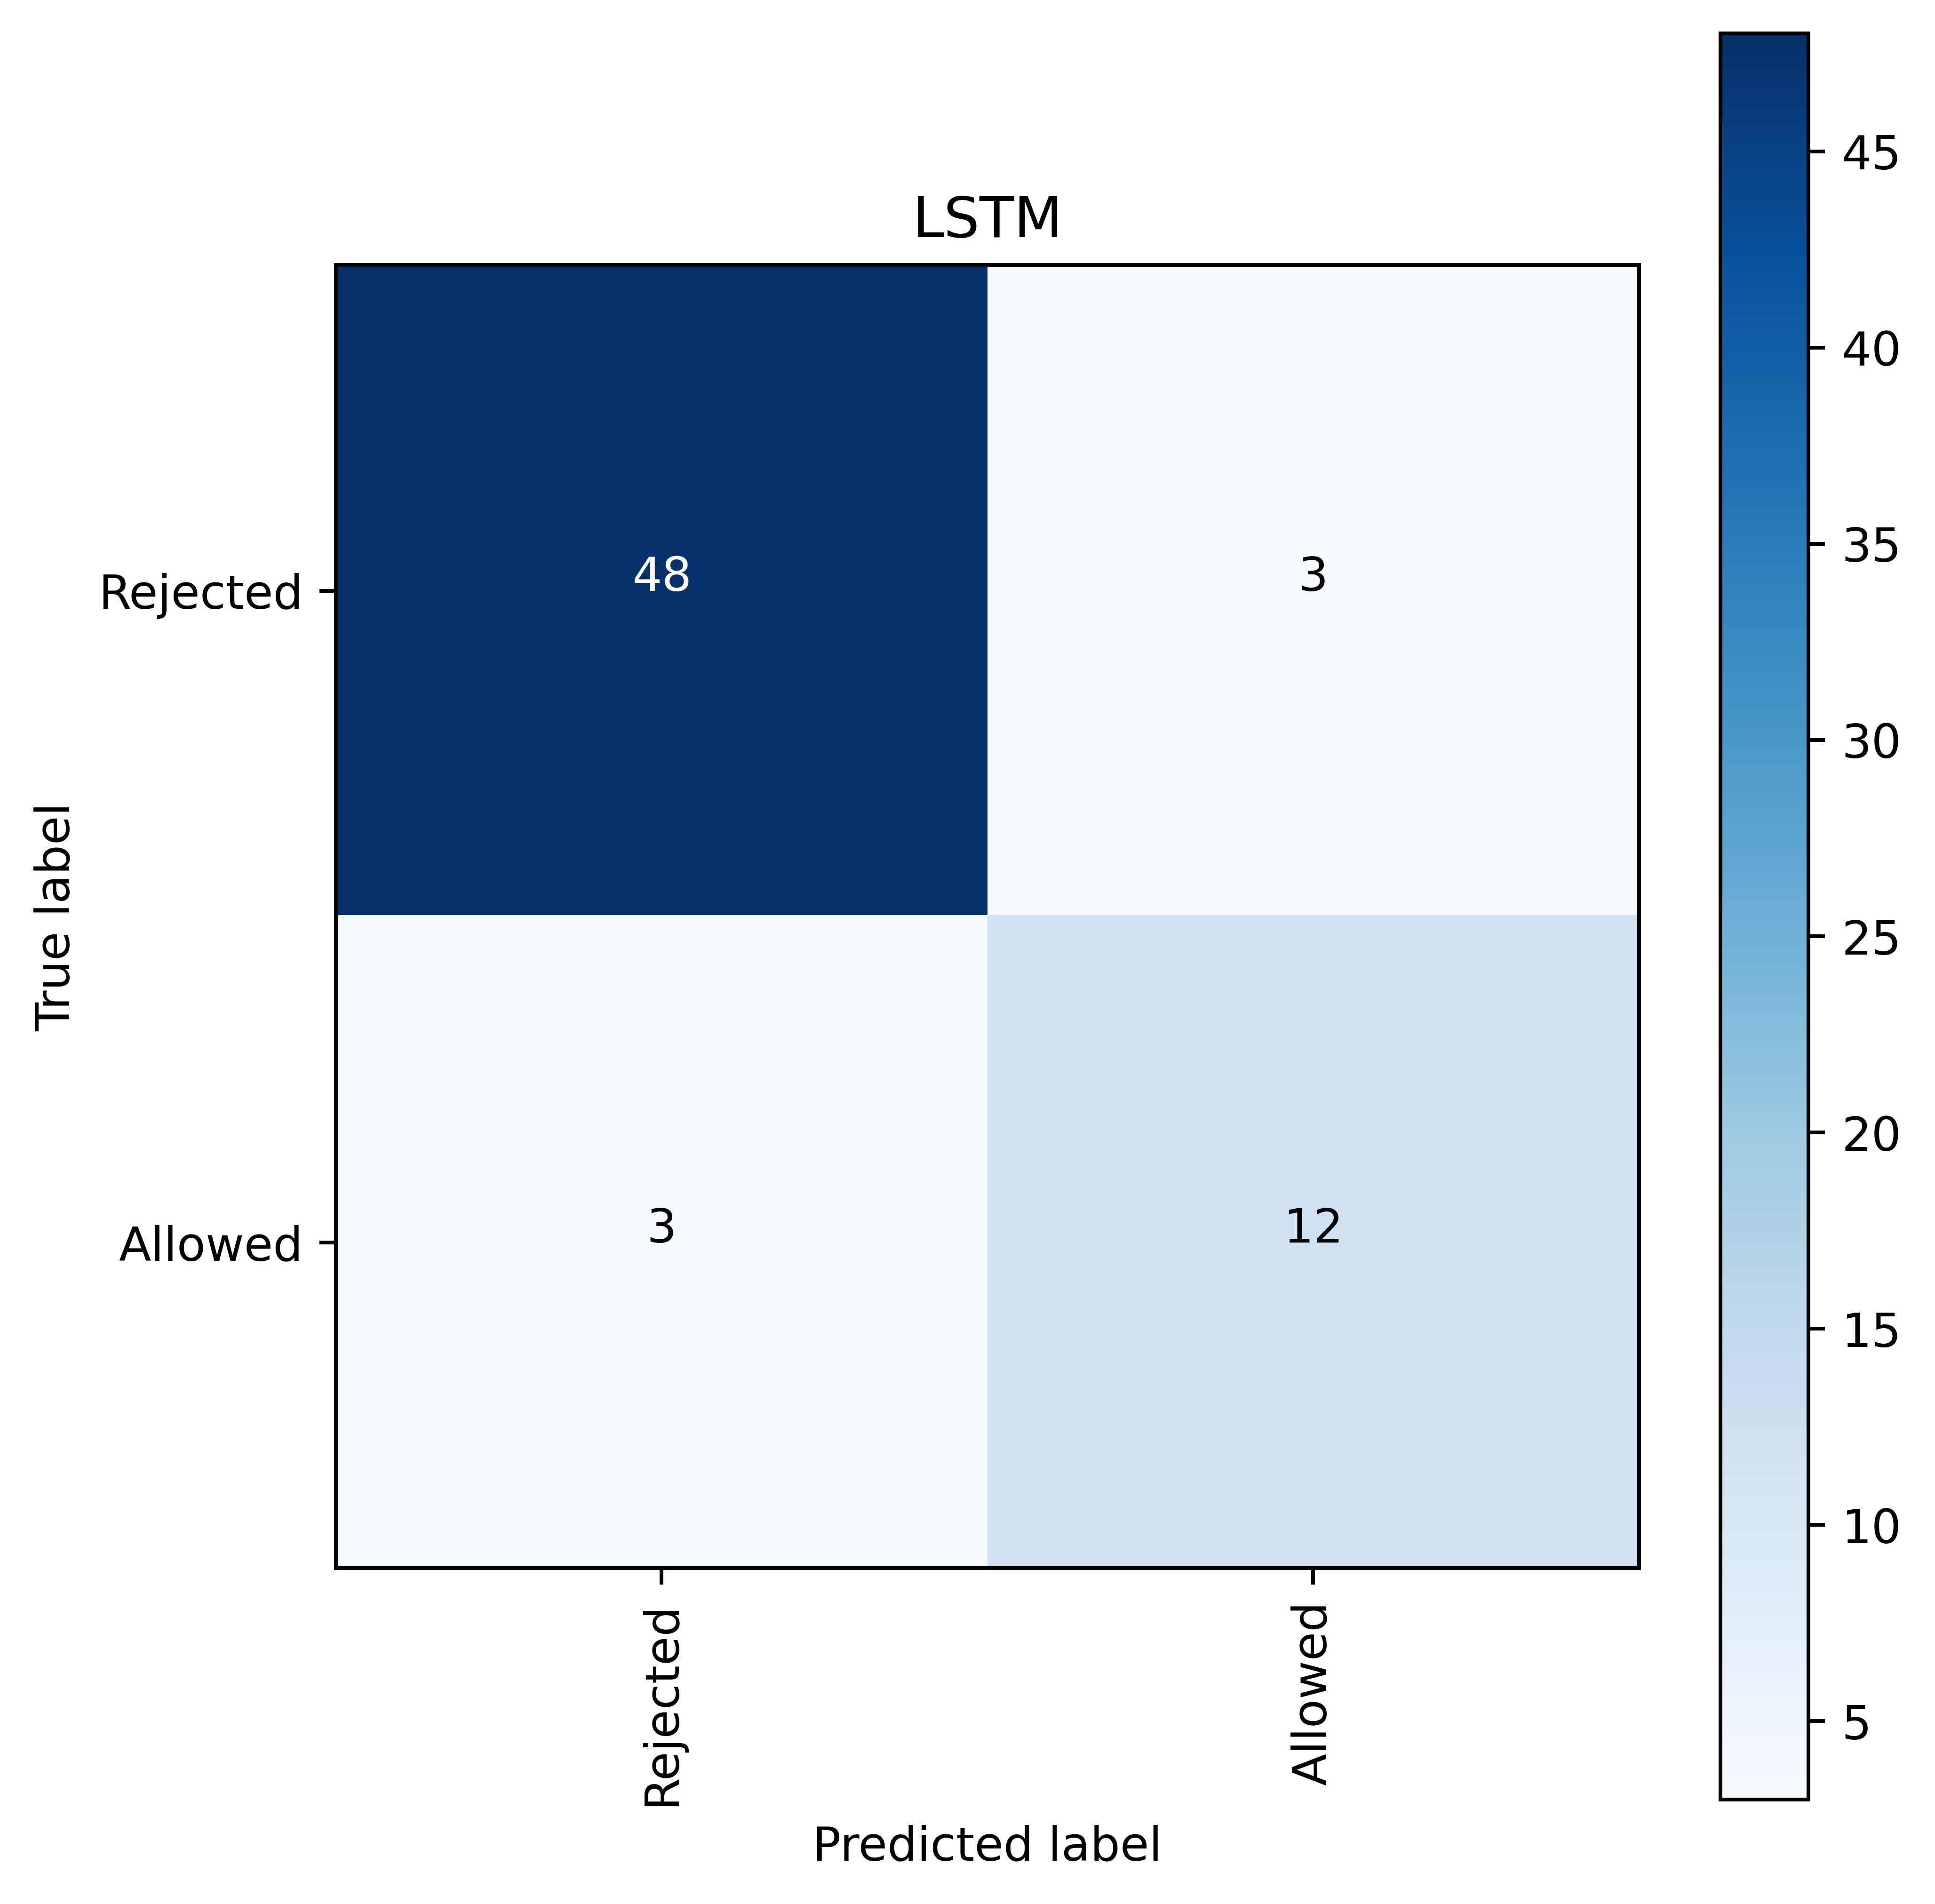

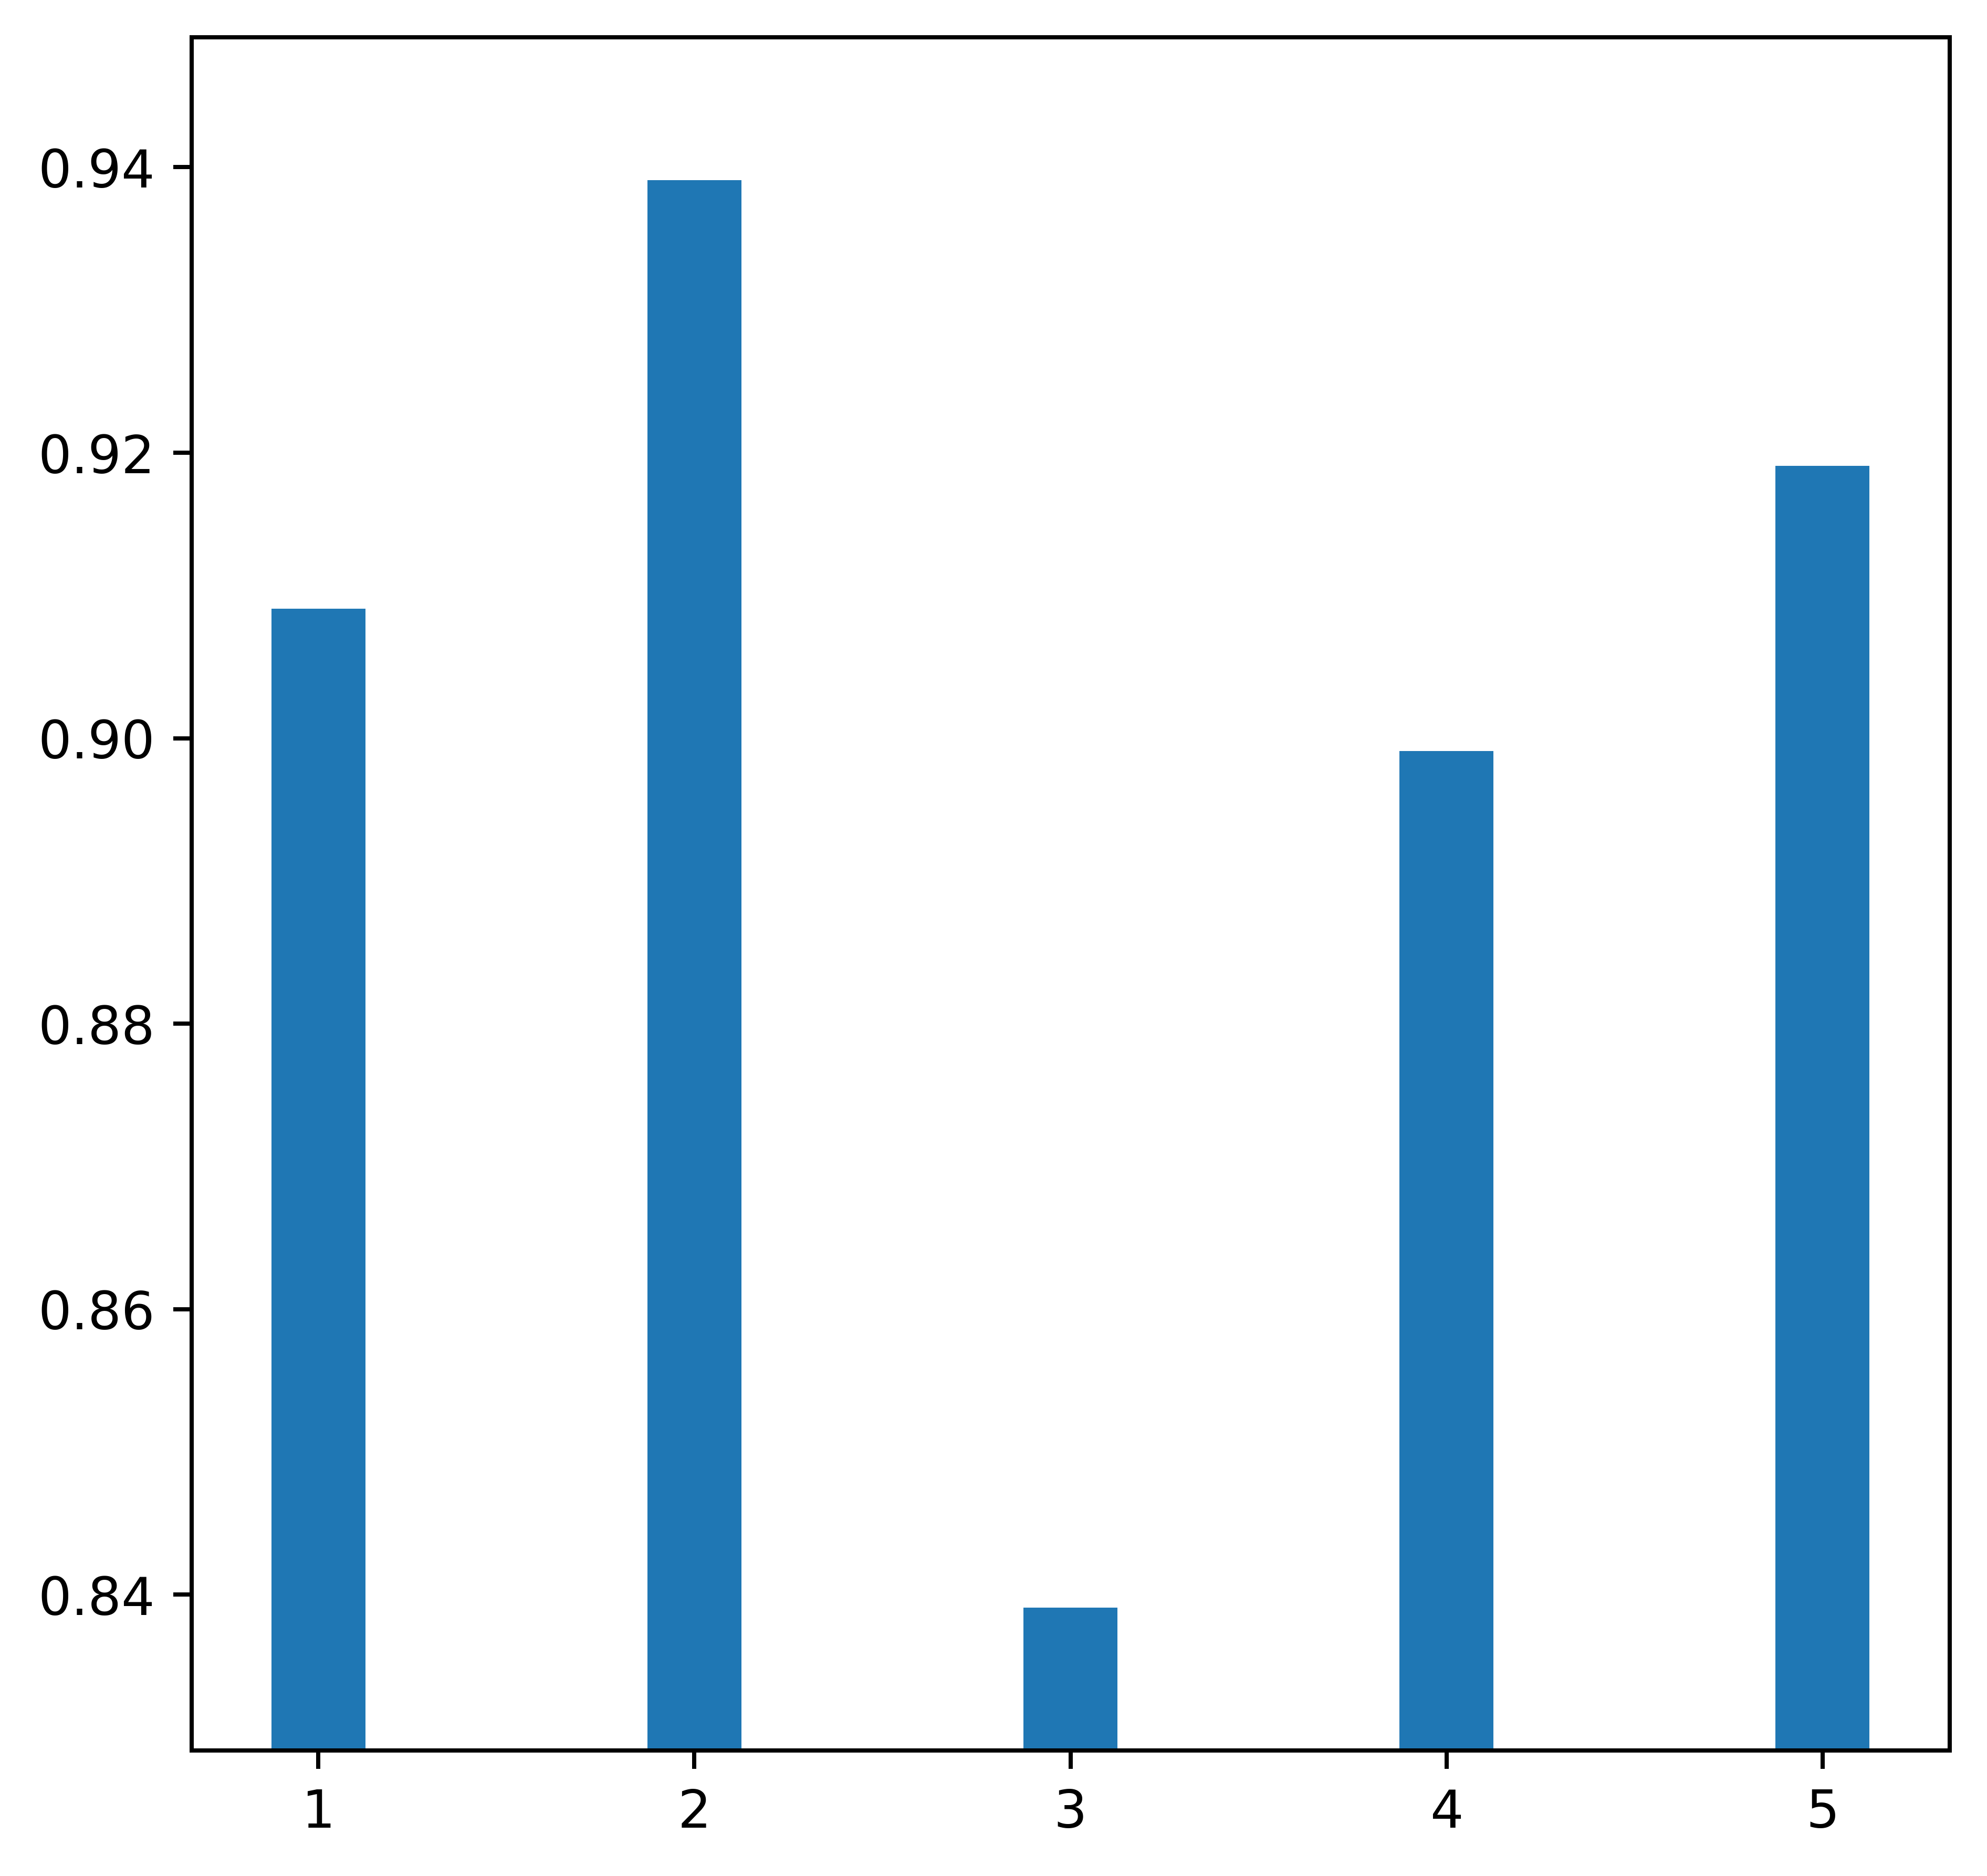

In [30]:
import matplotlib.pyplot as plt
import json
import itertools
import numpy as np
import os

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, filename='cf-matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    fig = plt.figure(figsize=(6,6),dpi=720)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#    fig.align_labels()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    #fig.savefig('./results/' + filename+"-cf.png")

label_names = ['Rejected', 'Allowed']

def plotF1Scores (result):
    f1_scores = []
    for i in range(5):
        f1_scores.append(result[str(i)]['classification_report']["weighted avg"]["f1-score"])
    
    fig = plt.figure(figsize=(6,6),dpi=720)
    subplot = fig.add_subplot(1, 1, 1)
    width = 0.25
    xVals = np.linspace(1, 5, num=5, dtype=int)
    tick_labels = np.linspace(1, 5, num=5, dtype=int)
    print(f1_scores)
    subplot.bar(xVals,f1_scores,width,tick_label=tick_labels)
#    subplot.bar(xVals,f1_scores,width)
#    subplot.xaxis.set_ticks([])
#    subplot.xaxis.set_ticklabels([])
    subplot.set_ylim(bottom=min(f1_scores)-0.01, top=max(f1_scores)+0.01)

os.chdir('D:\\PhD\\Dataset\\Results')
with open ('NB-14-07-2020-19-47-10.json') as fh:
    result = json.loads(fh.read())
    cm = result['confusion_matrix']
    cm = np.array([np.array(xi) for xi in cm])
    plot_confusion_matrix(cm, classes=np.asarray(label_names), normalize=False, title='Naive Bayes', filename='nb')

with open ('LSTM-12-07-2020-15-40-00.json') as fh:
    result = json.loads(fh.read())
    cm = result['0']['confusion_matrix']
    cm = np.array([np.array(xi) for xi in cm])
    plot_confusion_matrix(cm, classes=np.asarray(label_names), normalize=False, title='LSTM', filename='lstm')
    plotF1Scores (result)
    